In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#导入数据
df_jia = pd.read_excel("2_高钾.xlsx")
df_qian = pd.read_excel("2_铅.xlsx")

In [46]:
data = df_jia.iloc[:,6:9]

In [47]:
data=data.values
data

array([[ 3.93,  1.74,  3.87],
       [ 4.06,  0.  ,  0.78],
       [ 5.5 ,  2.16,  5.09],
       [ 6.44,  2.06,  2.18],
       [ 7.5 ,  2.62,  3.27],
       [11.15,  2.39,  2.51],
       [10.05,  6.04,  2.18],
       [ 1.98,  0.17,  3.24],
       [ 1.32,  0.32,  1.55],
       [ 0.81,  0.26,  0.84],
       [ 1.46,  0.29,  1.65],
       [ 6.16,  2.88,  4.73],
       [ 9.23,  0.5 ,  0.47],
       [ 3.15,  1.04,  1.29],
       [ 6.18,  0.42,  1.07],
       [ 0.  ,  1.04,  1.09],
       [ 3.05,  0.  ,  0.  ],
       [ 6.19,  2.37,  3.28],
       [ 3.5 ,  0.35,  0.55],
       [ 2.51,  0.2 ,  1.54]])

In [10]:
#Topsis函数定义
#0 极大型 
#1 极小型
#2 中间型 额外标志：Xbest #PS:个人感觉，中间型的转换，本质上是先转换成极小型再转换成极大型
#3 区间型 额外标志：[a,b]区间 #正向化的方法是不唯一的，这里参考网课上的
#正向化
def ForwardDirection(m,y):#m表示输入矩阵，y表示指标类型
    num=len(y)
    for i in range(num):
        #i代表着第i个指标，对应着m的第i列（从0计数）
        labeltype=y[i]
        if(labeltype[0]==0):
            print("第",i+1,"个指标为极大型指标，无需正向化")
        elif(labeltype[0]==1):
            print("第",i+1,"个指标为极小型指标，进行正向化")
            maxnum=np.amax(m,axis=0)#返回每一列元素的最大值
            maxnum=maxnum[i]
            m[:,i]= maxnum-m[:,i]
        elif(labeltype[0]==2):
            print("第",i+1,"个指标为中间型指标，进行正向化")
            xbest=labeltype[1]
            M=np.max(np.abs(m[:,i]-xbest))
            m[:,i]=(1-np.abs(m[:,i]-xbest)/M)
        elif(labeltype[0]==3):
            print("第",i+1,"个指标为区间型指标，进行正向化")
            a=labeltype[1]
            b=labeltype[2]
           # print("a,b:",a,b)
            minx=np.min(m[:,i])
            maxx=np.max(m[:,i])
            #print(m[:,i])
           # print("min,max",minx,maxx)
            M=max(a-minx,maxx-b)
            col=len(m[:,i])
            for j in range(col):
                if(m[j,i]<a):
                    m[j,i]=1-(a-m[j,i])/M
                elif(m[j,i]<=b and m[j,i]>=a):
                    m[j,i]=1
                elif(m[j,i]>b):
                    m[j,i]=1-(m[j,i]-b)/M
    return m

def Standardize(m):#m为输入矩阵，且已经正向化
    
    #第一步，先把m中元素乘方
    temp_all=np.power(m,2)

    #第二步，按列求和得到一个行向量
    temp_all=np.sum(temp_all,axis=0)#在第一个轴展开方向上求和

    #第三步，将行向量元素开方
    temp_all=np.power(temp_all,1/2)

    #第四步，将m中每一列元素除以第三部中行向量对应列元素
    for i in range(len(temp_all)):
        m[:,i]=m[:,i]/temp_all[i]
       
    return m

#计算得分
def getGrade(m,w):#m为输入矩阵，且已经标准化
    
    #第一步，得到每一列的最大值Zmax与最小值Zmin
    Zmax=np.max(m,axis=0)
    Zmin=np.min(m,axis=0)
    
    #第二步，通过ZmaxZmin得到每个样本（即本例中的小王小明等）的每个指标到各个指标最大值的距离与到最小值的距离
        #1.将m中的每一列元素减去Zmax/Zmin中对应列的值
        #2.然后将结果乘方
        #3.按列方向展开求和
        #4.再开方，从而得到每个评价对象（即样本）的Dmax与Dmin（注意：这里的算法我还没有算上权重）
    Dmax = np.subtract(m,Zmax)#Zmax是行向量，这里有广播
   # print(Dmax)
    Dmin = np.subtract(m,Zmin)#同上
    Dmax=np.power(Dmax,2)
    Dmin=np.power(Dmin,2)
    
    Dmax=Dmax*w
    Dmin=Dmin*w
    
    Dmax=np.sum(Dmax,axis=1)
    Dmin=np.sum(Dmin,axis=1)
 
    Dmax=np.power(Dmax,1/2)
    Dmin=np.power(Dmin,1/2)
    #print("Dmax,Dmin",Dmax,"\n",Dmin)
    #第三步，根据公式：分数=到最小值距离/(到最大值距离+到最小值距离)，算出每个评价对象的综合得分S
    S=Dmin/(Dmax+Dmin)
    #print(S)
    #第四步，对得分进行归一化
    S_sum=np.sum(S,axis=0)
    S=S/S_sum
    return S

In [66]:
data=np.array(data,dtype=np.float32)
label=[[1],[1],[1]]
#w=[1/3,1/3,1/3]*data.shape[0]

data=ForwardDirection(data,label)
data=Standardize(data)
S=getGrade(data,w)

第 1 个指标为极小型指标，进行正向化
第 2 个指标为极小型指标，进行正向化
第 3 个指标为极小型指标，进行正向化


In [67]:
S_df = pd.DataFrame(S,columns=['Topsis得分'])
S_df.to_excel(excel_writer=r"2022C数据处理1.xlsx")

In [62]:
w=[[1/3,1/3,1/3]]*data.shape[0]
w=np.array(w)
w

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [65]:
index = np.argwhere(data == 0)
#print(inde
w[np.where(data==0)]=0
w

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.        , 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.33333333, 0.33333333],
       [0.33333333, 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [23]:
data

array([[2, 2],
       [5, 0],
       [6, 1]], dtype=int64)

In [73]:
df_new = pd.read_excel("2_高钾.xlsx")
df_new

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),合计,表面风化,类别,Topsis得分
0,10,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00,99.81,风化,高钾,0.072464
1,09,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00,99.77,风化,高钾,0.065665
2,17,60.71,2.12,5.71,0.00,0.85,0.00,1.04,1.09,0.19,0.00,0.18,0.00,0.00,0.00,71.89,无风化,高钾,0.065310
3,22,92.35,0.00,0.74,1.66,0.64,3.50,0.35,0.55,0.00,0.00,0.21,0.00,0.00,0.00,100.00,风化,高钾,0.065134
4,12,94.29,0.00,1.01,0.72,0.00,1.46,0.29,1.65,0.00,0.00,0.15,0.00,0.00,0.00,99.57,风化,高钾,0.064655
5,27,92.72,0.00,0.00,0.94,0.54,2.51,0.20,1.54,0.00,0.00,0.36,0.00,0.00,0.00,98.81,风化,高钾,0.063141
6,15,61.87,3.21,7.44,0.00,1.02,3.15,1.04,1.29,0.19,0.00,0.26,0.00,0.00,0.00,79.47,无风化,高钾,0.061292
7,18,79.46,0.00,9.42,0.00,1.53,3.05,0.00,0.00,0.00,0.00,1.36,0.07,2.36,0.00,97.25,无风化,高钾,0.059188
8,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00,100.00,无风化,高钾,0.059135
9,16,65.18,2.10,14.52,8.27,0.52,6.18,0.42,1.07,0.11,0.00,0.00,0.04,0.00,0.00,98.41,无风化,高钾,0.053767


In [77]:
x = np.arange(20)
y_sio2 = df_new.iloc[:,1].values
y_na20 = df_new.iloc[:,2].values
y_k20 = df_new.iloc[:,3].values
y_cao = df_new.iloc[:,4].values
y_mgo = df_new.iloc[:,5].values
y_al2o3 = df_new.iloc[:,6].values

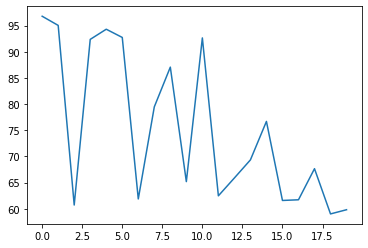

In [80]:
plt.plot(x,y_sio2)
plt.show()

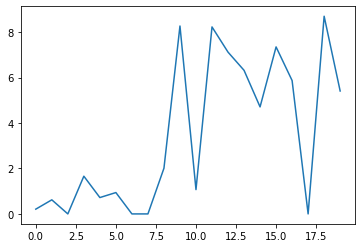

In [81]:
plt.plot(x,y_cao)
plt.show()

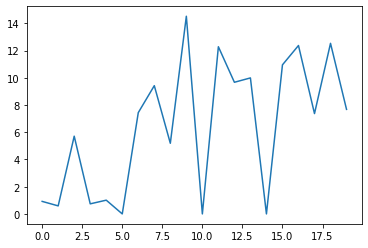

In [82]:
plt.plot(x,y_k20)
plt.show()

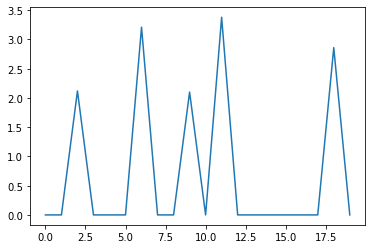

In [83]:
plt.plot(x,y_na20)
plt.show()

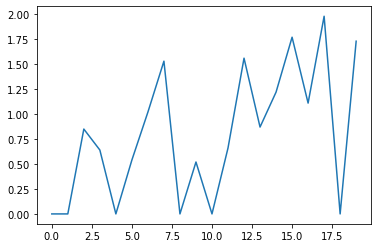

In [84]:
plt.plot(x,y_mgo)
plt.show()

In [86]:
y_al2o3

array([ 0.81,  1.32,  0.  ,  3.5 ,  1.46,  2.51,  3.15,  3.05,  4.06,
        6.18,  1.98,  9.23,  6.44,  3.93,  6.19,  7.5 ,  5.5 , 11.15,
        6.16, 10.05])